# Lab5: Rumelhart Semantic Network

In [1]:
!pip install psyneulink

Imports Successful
This will be our color palette


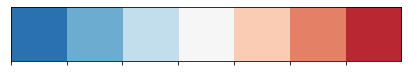

In [2]:

import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline
from mpl_toolkits import mplot3d
import psyneulink as pnl

# This couple of lines sets our color palette
import seaborn as sb
sb.palplot(sb.color_palette("RdBu_r", 7))
sb.set_palette("RdBu_r",7)
sb.set_style("whitegrid")

print("Imports Successful")
print("This will be our color palette")

## Multilayer NN in Pscyhology: Semantics
  
Our minds are full of associations, presumably implemented as connection strengths between concepts.  But associations can have a wide variety of structure -- they are not merely symmetric (e.g. "dog" and "mail carrier" are associated but have an asymmetric relationship -- the mail carrier is less likely to bite the dog than vice a versa).   Semantic networks are graphs used to model the relationships between concepts in the mind, and are a commonly used representation of knowledge. They are depicted as graphs, whose vertices are concepts and whose edges represent connections between concepts. A concept that is a noun is connected to its characteristics, but also to categories that it is a member of. Nouns that share a category (e.g. birds and dogs are both animals) both have a connection to that category, and share a higher-order connection between that category and a category to which it belongs (e.g. animals belong to the category living things).  
  
In this way, semantic nets can contain a deductive logical heirarchy. One of the key features arising from this heirarchy is the "inheritance" property, which states that a concept belonging to a subcategory will inherit the properties of that subcategory and, by extension, any category to which the subcategory belongs.    
  
To clarify, consider hearing the phrase "Blue-Footed Booby" for the first time. Initially, it contains very little information. If you are then told that it is the name of a bird, you'll know that it must necessarily have feathers, a beak, feet, and eyes. You will also know that it is a living thing, and therefore grows and is comprised of cells. This is the inheritance property at work.  

<img src="https://drive.google.com/uc?id=1gmcwDlxGRogRKFoG_Xhy5K2moTzHXfVh">  
  
  
Dave Rumelhart used neural networks to model semantic networks, recreating structured knowledge representations using hidden layers and backprop learning.  
  
In order to represent the semantic net computationally, Rumelhart came up with a particularly clever structure of a multi-layer network, with two input layers, two hidden layers, and four output layers.  
  
<img src="https://drive.google.com/uc?id=1tbB4TGeT9JWFG-BOpfNXk8q5u-aD0cQ3">  
  
When training networks of this structure, it was found that the represenational nodes, when adequately trained, came to represent distinguishing features of their inputs. They were internal representations of the concepts similar to those created in the human mind.  
  
Let us explore his idea by building it ourselves.

##  <a id='m4'>Rumelhart's Semantic Network</a> 

The first thing we will do is create a data set with examples and labels that we can train the net on. We'll be using a similar data set to the one in Rumelhart's original paper on the semantic net (Rumelhart, Hinton, & Williams, 1986).  

The "nouns" inputs are provided to you in a list, as are the "relations". The relations consist of "I", which is simply the list of nouns, "is" which is a list of larget categories to which the noun can belong, "has", which are potential physical attributes, and "can", which are abilities each noun possesses.  
  
The network takes as input a pair of nouns and relations, which form a priming statement, such as "daisy is a", and should produce a response from the network that includes both a list of what a daisy is, and lists of what a daisy has and can do, as well as the actual term "daisy". This response mimics the brain's priming response, by creating activation for concepts related to the one explicitly stated.  
  
This is a slighly simplified model of Rumelhart's network, which learned associations through internal structure only, not through explicit updating for every output.    

In [3]:
# Stimuli and Relations
# [Use for Homework 1a.]

nouns = ['oak', 'pine', 'rose', 'daisy', 'canary', 'robin', 'salmon', 'sunfish']
relations = ['is', 'has', 'can']
is_list = ['living', 'living thing', 'plant', 'animal', 'tree', 'flower', 'bird', 'fish', 'big', 'green', 'red',
           'yellow']
has_list = ['roots', 'leaves', 'bark', 'branches', 'skin', 'feathers', 'wings', 'gills', 'scales']
can_list = ['grow', 'move', 'swim', 'fly', 'breathe', 'breathe underwater', 'breathe air', 'walk', 'photosynthesize']
descriptors = [nouns, is_list, has_list, can_list]

truth_nouns = np.identity(len(nouns))

truth_is = np.zeros((len(nouns), len(is_list)))

truth_is[0, :] = [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
truth_is[1, :] = [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
truth_is[2, :] = [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
truth_is[3, :] = [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
truth_is[4, :] = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
truth_is[5, :] = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
truth_is[6, :] = [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]
truth_is[7, :] = [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]

truth_has = np.zeros((len(nouns), len(has_list)))

truth_has[0, :] = [1, 1, 1, 1, 0, 0, 0, 0, 0]
truth_has[1, :] = [1, 1, 1, 1, 0, 0, 0, 0, 0]
truth_has[2, :] = [1, 1, 0, 0, 0, 0, 0, 0, 0]
truth_has[3, :] = [1, 1, 0, 0, 0, 0, 0, 0, 0]
truth_has[4, :] = [0, 0, 0, 0, 1, 1, 1, 0, 0]
truth_has[5, :] = [0, 0, 0, 0, 1, 1, 1, 0, 0]
truth_has[6, :] = [0, 0, 0, 0, 0, 0, 0, 1, 1]
truth_has[7, :] = [0, 0, 0, 0, 0, 0, 0, 1, 1]

truth_can = np.zeros((len(nouns), len(can_list)))

truth_can[0, :] = [1, 0, 0, 0, 0, 0, 0, 0, 1]
truth_can[1, :] = [1, 0, 0, 0, 0, 0, 0, 0, 1]
truth_can[2, :] = [1, 0, 0, 0, 0, 0, 0, 0, 1]
truth_can[3, :] = [1, 0, 0, 0, 0, 0, 0, 0, 1]
truth_can[4, :] = [1, 1, 0, 1, 1, 0, 1, 1, 0]
truth_can[5, :] = [1, 1, 0, 1, 1, 0, 1, 1, 0]
truth_can[6, :] = [1, 1, 1, 0, 1, 1, 0, 0, 0]
truth_can[7, :] = [1, 1, 1, 0, 1, 1, 0, 0, 0]

truths = [[truth_nouns], [truth_is], [truth_has], [truth_can]]



In [4]:
def gen_input_vals(nouns, relations):

    rumel_nouns_bias=np.vstack((np.identity(len(nouns)),np.ones((1,len(nouns)))))
    rumel_nouns_bias=rumel_nouns_bias.T

    rumel_rels_bias=np.vstack((np.identity(len(relations)),np.ones((1,len(relations)))))
    rumel_rels_bias=rumel_rels_bias.T
    return (rumel_nouns_bias, rumel_rels_bias)

nouns_onehot, rels_onehot = gen_input_vals(nouns, relations)

r_nouns = np.shape(nouns_onehot)[0]
c_nouns = np.shape(nouns_onehot)[1]
r_rels = np.shape(rels_onehot)[0]
c_rels = np.shape(rels_onehot)[1]

In [5]:
# Build Transfer Mechanisms

#In order to build in biases, we add an extra node to every layer, including the inputs

#For the input layers, we will use linear transfer mechanisms

n_units=16;

#This number of hidden units is taken directly from Rumelhart's paper

nouns_in = pnl.TransferMechanism(name="nouns_in", 
                                 default_variable=np.zeros(c_nouns)
                                )

rels_in = pnl.TransferMechanism(name="rels_in", 
                                default_variable=np.zeros(c_rels)
                               )

#For the hidden layers, we will be using logistic functions

hn = pnl.TransferMechanism(name="hidden_nouns",
                           size=9,
                           function=pnl.Logistic()
                            )

hm = pnl.TransferMechanism(name="hidden_mixed",
                           size=n_units,
                           function=pnl.Logistic()
                            )

out_sig_I = pnl.TransferMechanism(name="sig_outs_I",
                                  size=len(nouns),
                                  function=pnl.Logistic()
                                    )

out_sig_is = pnl.TransferMechanism(name="sig_outs_is",
                                   size=len(is_list),
                                   function=pnl.Logistic()
                                    )

out_sig_has = pnl.TransferMechanism(name="sig_outs_has",
                                    size=len(has_list),
                                    function=pnl.Logistic()
                                    )

out_sig_can = pnl.TransferMechanism(name="sig_outs_can",
                                    size=len(can_list),
                                    function=pnl.Logistic()
                                    )

In [6]:
# Here we create random matrices to connect the mechanisms to each other


map_nouns_hn = pnl.MappingProjection(
                                matrix=np.random.rand(c_nouns,c_nouns),
                                name="map_nouns_hn",
                                sender=nouns_in,
                                receiver=hn
                                )

map_rels_hm = pnl.MappingProjection(
                                matrix=np.random.rand(c_rels,n_units),
                                name="map_rel_hm",
                                sender=rels_in,
                                receiver=hm
                                )

map_hn_hm = pnl.MappingProjection(
                                matrix=np.random.rand(c_nouns,n_units),
                                name="map_hn_hm",
                                sender=hn,
                                receiver=hm
                                )

map_hm_I = pnl.MappingProjection(
                                matrix=np.random.rand(n_units,len(nouns)),
                                name="map_hm_I",
                                sender=hm,
                                receiver=out_sig_I
                                )

map_hm_is = pnl.MappingProjection(
                                matrix=np.random.rand(n_units,len(is_list)),
                                name="map_hm_is",
                                sender=hm,
                                receiver=out_sig_is
                                )

map_hm_has = pnl.MappingProjection(
                                matrix=np.random.rand(n_units,len(has_list)),
                                name="map_hm_has",
                                sender=hm,
                                receiver=out_sig_has
                                )

map_hm_can = pnl.MappingProjection(
                                matrix=np.random.rand(n_units,len(can_list)),
                                name="map_hm_can",
                                sender=hm,
                                receiver=out_sig_can
                                )


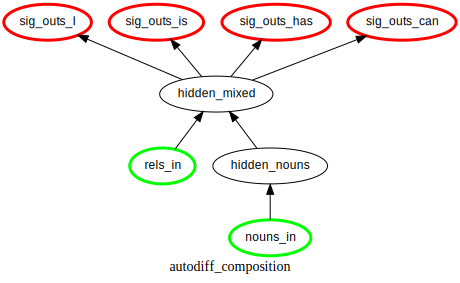

In [7]:
#This block of code constructs the network

RumelNet = pnl.AutodiffComposition(
        learning_rate=1
        )
    
    
RumelNet.add_node(nouns_in)
RumelNet.add_node(rels_in)
RumelNet.add_node(hn)
RumelNet.add_node(hm)
RumelNet.add_node(out_sig_I)
RumelNet.add_node(out_sig_is)
RumelNet.add_node(out_sig_has)
RumelNet.add_node(out_sig_can)

RumelNet.add_projection(sender=nouns_in, projection=map_nouns_hn, receiver=hn)
RumelNet.add_projection(sender=rels_in, projection=map_rels_hm, receiver=hm)
RumelNet.add_projection(sender=hn, projection=map_hn_hm, receiver=hm)
RumelNet.add_projection(sender=hm, projection=map_hm_I, receiver=out_sig_I)
RumelNet.add_projection(sender=hm, projection=map_hm_is, receiver=out_sig_is)
RumelNet.add_projection(sender=hm, projection=map_hm_has, receiver=out_sig_has)
RumelNet.add_projection(sender=hm, projection=map_hm_can, receiver=out_sig_can)



out_sig_I.log.set_log_conditions(pnl.VALUE)
out_sig_is.log.set_log_conditions(pnl.VALUE)
out_sig_has.log.set_log_conditions(pnl.VALUE)
out_sig_can.log.set_log_conditions(pnl.VALUE)


RumelNet.show_graph(output_fmt='jupyter')

In [8]:
# We wish to train our network on pairs of inputs: a noun and a relation.
# On each run, we would like to set the targets for the RELEVANT outputs to be 
# the associated truth tables and the targets for the IRRELEVANT outputs to be
# a set of "neutral" targets, producing a somewhat "nonsense" response. 

# To get a better grasp on this concept:
# Consider the case that a person asks you which out of the "has" list a robin
# posseses. You will respond, likely correctly, with some of those attributes and
# you will not list any of the "can" attributes, because they're not related to
# the question. 

# This is a skill we learn early in life. When asked a simple, closed-form
# question in elementary school, we were not rewarded in the same way for giving
# an answer that was related to the question, but did not actually answer it. 
# If the question was, "can a canary fly?" and we gave the answer, "a canary is 
# a yellow living thing with wings that can breathe air", we wouldn't technically
# be wrong, but we would also not have answered the question. 

# We want to train the network in a similar fashion.

# This block of code creates the targets that will be assigned to outputs irrelevant
# to the input pairs. 


irrel_is = np.ones((len(nouns), len(is_list)))*.5
irrel_has = np.ones((len(nouns), len(has_list)))*.5
irrel_can = np.ones((len(nouns), len(can_list)))*.5


In [9]:
# This block of code trains the network using a set of three loops. The innermost
# pair of loops takes each noun and creates the appropriate training inputs and outputs associated
# with its "is", "has", and "can" relations. It will also be associated with an 
# identity output. 

# After constructing the dictionaries, the middle loop, associated with the nouns,
# trains the network on the dictionaries for n_epochs. 

# The outermost loop simply repeats the training on each noun for a set number of
# repetitions. 

# You are encouraged to experiment with changing the number of repetitions and 
# epochs to see how the network learns best. 

# You will find that this code takes a few minutes to run. We have placed flags
# in the loops so you can see that it's not stuck.

n_epochs=5
tot_reps=200

for reps in range(tot_reps):
  print('Training rep: ',reps+1, ' of: ',tot_reps)
  for noun in range(len(nouns)):
    
    inputs_dict = {}

    targets_dict = {}
    targets_dict[out_sig_is] = []
    targets_dict[out_sig_has] = []
    targets_dict[out_sig_can] = []

    inputs_dict[nouns_in] = []
    targets_dict[out_sig_I] = []
    inputs_dict[rels_in] = []

    for i in range(len(relations)):

      if i==0:
        rel = 'is'

        targ_is = truth_is[noun],
        targ_has = irrel_has[noun],
        targ_can = irrel_can[noun],
        
        targ_is=np.reshape(targ_is,np.amax(np.shape(targ_is)))
        targ_has=np.reshape(targ_has,np.amax(np.shape(targ_has)))
        targ_can=np.reshape(targ_can,np.amax(np.shape(targ_can)))

      elif i==1:
        rel = 'has'

        targ_is = irrel_is[noun] ,
        targ_has = truth_has[noun],
        targ_can = irrel_can[noun],
        
        targ_is=np.reshape(targ_is,np.amax(np.shape(targ_is)))
        targ_has=np.reshape(targ_has,np.amax(np.shape(targ_has)))
        targ_can=np.reshape(targ_can,np.amax(np.shape(targ_can)))


      else:
        rel = 'can'

        targ_is = irrel_is[noun] ,
        targ_has = irrel_has[noun],
        targ_can = truth_can[noun],
        
        targ_is=np.reshape(targ_is,np.amax(np.shape(targ_is)))
        targ_has=np.reshape(targ_has,np.amax(np.shape(targ_has)))
        targ_can=np.reshape(targ_can,np.amax(np.shape(targ_can)))


      targets_dict[out_sig_is].append(targ_is)
      targets_dict[out_sig_has].append(targ_has)
      targets_dict[out_sig_can].append(targ_can)

      inputs_dict[nouns_in].append(nouns_onehot[noun])
      targets_dict[out_sig_I].append(truth_nouns[noun])
      inputs_dict[rels_in].append(rels_onehot[i])

    
    result = RumelNet.learn(inputs=[{'inputs': inputs_dict,
                                'targets': targets_dict,
                                'epochs': n_epochs}])



Training rep:  1  of:  200


/usr/local/lib/python3.7/dist-packages/psyneulink/core/globals/utilities.py:402: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if reference is not None and (candidate == reference):
/usr/local/lib/python3.7/dist-packages/psyneulink/core/globals/utilities.py:402: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if reference is not None and (candidate == reference):
/usr/local/lib/python3.7/dist-packages/psyneulink/core/globals/utilities.py:402: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  2  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  3  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  4  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  5  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  6  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  7  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  8  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  9  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  10  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  11  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  12  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  13  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  14  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  15  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  16  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  17  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  18  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  19  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  20  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  21  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  22  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  23  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  24  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  25  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  26  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  27  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  28  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  29  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  30  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  31  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  32  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  33  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  34  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  35  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  36  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  37  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  38  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  39  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  40  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  41  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  42  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  43  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  44  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  45  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  46  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  47  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  48  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  49  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  50  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  51  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  52  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  53  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  54  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  55  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  56  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  57  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  58  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  59  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  60  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  61  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  62  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  63  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  64  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  65  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  66  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  67  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  68  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  69  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  70  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  71  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  72  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  73  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  74  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  75  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  76  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  77  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  78  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  79  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  80  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  81  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  82  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  83  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  84  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  85  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  86  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  87  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  88  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  89  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  90  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  91  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  92  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  93  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  94  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  95  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  96  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  97  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  98  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  99  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  100  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  101  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  102  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  103  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  104  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  105  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  106  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  107  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  108  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  109  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  110  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  111  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  112  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  113  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  114  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  115  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  116  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  117  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  118  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  119  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  120  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  121  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  122  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  123  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  124  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  125  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  126  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  127  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  128  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  129  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  130  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  131  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  132  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  133  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  134  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  135  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  136  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  137  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  138  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  139  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  140  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  141  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  142  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  143  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  144  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  145  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  146  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  147  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  148  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  149  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  150  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  151  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  152  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  153  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  154  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  155  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  156  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  157  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  158  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  159  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  160  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  161  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  162  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  163  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  164  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  165  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  166  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  167  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  168  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  169  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  170  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  171  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  172  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  173  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  174  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  175  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  176  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  177  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  178  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  179  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  180  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  181  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  182  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  183  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  184  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  185  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  186  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  187  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  188  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  189  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  190  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  191  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  192  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  193  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  194  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  195  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  196  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  197  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  198  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  199  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Training rep:  200  of:  200


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

last lost was:  0.0060375913223746445


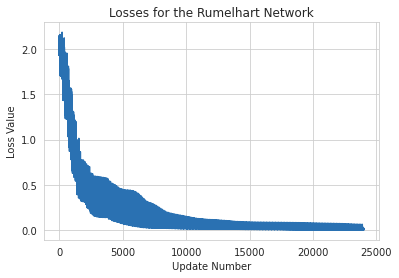

In [10]:
# As with previous nets, this cell prints the losses of the network over time. 
# Make sure you understand why the losses are noisy. 

# If you find your loss isn't to your satisfaction, you can run the previous cell again
# to train your network for another batch.

exec_id = RumelNet.default_execution_id
losses = RumelNet.parameters.losses.get(exec_id)

plt.xlabel('Update Number')
plt.ylabel('Loss Value')
plt.title('Losses for the Rumelhart Network')
plt.plot(losses)
print('last lost was: ',losses[-1])



In [11]:
#We can check what associations have been  learned by running each noun  through the network 
noun_id=0 #indexes which noun to use 
rels_onehot[noun_id]
dd={nouns_in:nouns_onehot[noun_id]}
noun_out_I,noun_out_is,noun_out_has,noun_out_can=RumelNet.run(dd)


Output()

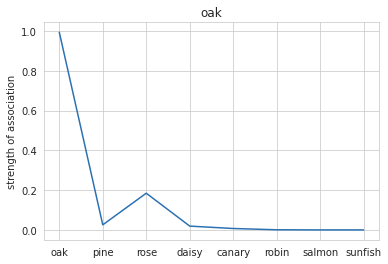

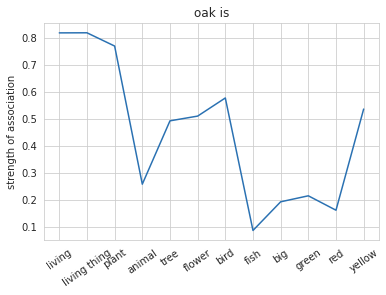

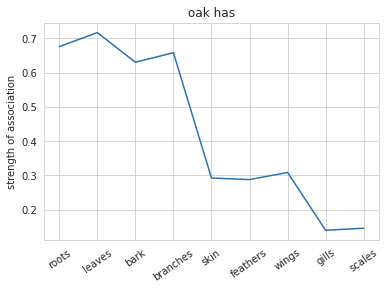

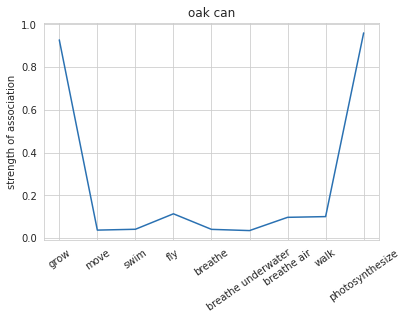

In [12]:
plt.plot(noun_out_I)
plt.xticks(np.arange(8),nouns)
plt.title(nouns[noun_id])
plt.ylabel('strength of association')
plt.show()


plt.plot(noun_out_is)
plt.xticks(np.arange(len(is_list)),is_list,rotation=35)
plt.title(nouns[noun_id] +' is')
plt.ylabel('strength of association')
plt.show()
plt.plot(noun_out_has)
plt.xticks(np.arange(len(has_list)),has_list,rotation=35)
plt.title(nouns[noun_id]+ ' has')
plt.ylabel('strength of association')
plt.show()
plt.plot(noun_out_can)
plt.xticks(np.arange(len(can_list)),can_list,rotation=35)
plt.title(nouns[noun_id]+' can')
plt.ylabel('strength of association')
plt.show()


# Exercises

We have provided a fairly sophisticated working model reproducing the primary functionality of Rumelhart's Semantic Network.  Your first challenge for homework is to fully reverse engineer this model -- to understand and explain all of the different components, annotating how it runs and what each part does.  The second challenge is to demonstrate that the model acquired the desired semantic structure.  The third challence is to build an analogous model using the provided model as a template.   

##  <a id='e5'>Exercise 1: Reverse Engineer the Semantic Network Model</a> 
1a. Refer back to the cell beginning # STIMULI & RELATIONS.  Provide a prose description of the meaning of the values for truth_is, truth_has, and truth_can, using specific details.  For example, how should we interpret the following line?
```python 
truth_is[0, :] = [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]    
```


1b. Explain what the following line does and why, including an explanation of "nouns_onehot"
```python 
r_nouns = np.shape(nouns_onehot)[0]
```


1c. In the cell that starts # Build Transfer Mechanisms, why is the size of hm set to 16?  


1d. Which of the transfer mechanisms uses a Linear function (as opposed to a sigmoid Logistic function)?


##  <a id='e6'>Exercise 2: Demonstrate Acquisition of Semantic Structure</a> 

The figures provided show learning and the minimization of error over training, but this is only the start.  Use reporting and whatever techniques are effective to convincingly demonstrate that the network has acquired the desired semantic structure by the end of training.  








##  <a id='e7'>Exercise 3: Create a New Semantic Network</a> 

Use the provided PNL code as a template.  Constraints: 1) You must create your own lists of stimuli and truth tables that make sense and are all different from the provided model.  2)  Your model must include the relations "is" "has" "can", and you are allowed to add more relations if you like.  3) The dimensionality of each feature list (nouns, is, has, can) of your network must be different than the dimensionality of the example provided, by 1 to 2.  E.g. The provided model has 8 nouns, so your model can have 6, 7, 9, or 10 nouns.  

Once your model is working, demonstrate that it learns and acquires the desired semantic structure.



##  BUILD
